In [1]:
# !pip install networking
# !pip install network
# !pip install networkx
# !pip install plotly
# !pip install decorator==5.0.9 
# !pip install --user decorator==4.3.0
# !pip install --user networkx==2.3
# !pip install decorator==5.0.9
# !pip install matplotlib
# !pip install decorator==4.0.9

In [2]:
import time
import pandas as pd
import itertools
import copy
from selenium import webdriver
from networkx import Graph
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
from nltk.text import Text
from nltk.corpus import stopwords
import string
from matplotlib import style
import networkx as nx

# Scraping University 1

In [3]:
options = Options()
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
driver.get('http://nu.edu.pk/Home')
time.sleep(5)
fast_paragraph1=driver.find_element_by_class_name('col-md-12').text
#driver.close()

time.sleep(10)
driver.get('http://nu.edu.pk/Admissions/HowToApply')
try:
    fast_paragraph2=driver.find_element_by_class_name('col-md-12').text
except:
    do_Nothing = True
#driver.close()

time.sleep(10)
driver.get('http://nu.edu.pk/University/History')
fast_paragraph3=driver.find_element_by_class_name('col-md-12').text
#driver.close()

time.sleep(10)
driver.get('http://nu.edu.pk/vision-and-mission')
fast_paragraph4=driver.find_element_by_class_name('col-md-12').text
#driver.close()

time.sleep(10)
driver.get('http://www.nu.edu.pk/QEC')
fast_paragraph5=driver.find_element_by_class_name('col-md-12').text
driver.close()




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\Ibrahim Bin Umair\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
<ipython-input-3-49836a1b6e2f>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
<ipython-input-3-49836a1b6e2f>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  fast_paragraph1=driver.find_element_by_class_name('col-md-12').text
<ipython-input-3-49836a1b6e2f>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  fast_paragraph2=driver.find_element_by_class_name('col-md-12').text
<ipython-input-3-49836a1b6e2f>:18: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  fast_paragra

In [4]:
def detect_noun_adj_verb(paragraph):
    tokens=word_tokenize(paragraph)
    result=pos_tag(tokens)
    Nouns=[]
    adjectives=[]
    verbs=[]
    size=len(result)
    for i in range(size):
        if result[i][1]=='JJR' or result[i][1]=='JJ' or result[i][1]=='JJS': #all the different adjectives
            adjectives.append(result[i][0])
        elif result[i][1]=='VB': #for verbs
            verbs.append(result[i][0])
        elif result[i][1]=='NN': #for nouns
            Nouns.append(result[i][0])
    return adjectives, verbs, Nouns

fastpara1_adj,fastpara1_verbs,fastpara1_nouns = detect_noun_adj_verb(fast_paragraph1)
fastpara2_adj,fastpara2_verbs,fastpara2_nouns = detect_noun_adj_verb(fast_paragraph2)
fastpara3_adj,fastpara3_verbs,fastpara3_nouns = detect_noun_adj_verb(fast_paragraph3)
fastpara4_adj,fastpara4_verbs,fastpara4_nouns = detect_noun_adj_verb(fast_paragraph4)
fastpara5_adj,fastpara5_verbs,fastpara5_nouns = detect_noun_adj_verb(fast_paragraph5)

# Scraping University 2

In [5]:
options = Options()
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
driver.get('http://www.uaar.edu.pk/about-us.php?content_id=100')
time.sleep(5)
uaar_paragraph1=driver.find_element_by_class_name('innerpages-cont').text

driver.get('http://www.uaar.edu.pk/index.php')
time.sleep(5)
uaar_paragraph2=driver.find_element_by_class_name('vc-msg-content').text

driver.get('http://www.uaar.edu.pk/fcfs/index.php')
time.sleep(5)
uaar_paragraph3=driver.find_element_by_class_name('innerpages-cont').text

driver.get('http://www.uaar.edu.pk/pd/index.php')
time.sleep(5)
uaar_paragraph4=driver.find_element_by_class_name('innerpages-cont').text

driver.get('http://www.uaar.edu.pk/oric-home.php')
time.sleep(5)
uaar_paragraph5=driver.find_element_by_class_name('innerpages-cont').text

driver.close()



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Ibrahim Bin Umair\.wdm\drivers\chromedriver\win32\96.0.4664.45]
<ipython-input-5-b678e7b219ec>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
<ipython-input-5-b678e7b219ec>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  uaar_paragraph1=driver.find_element_by_class_name('innerpages-cont').text
<ipython-input-5-b678e7b219ec>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  uaar_paragraph2=driver.find_element_by_class_name('vc-msg-content').text
<ipython-input-5-b678e7b219ec

In [6]:
uaarpara1_adj,uaarpara1_verbs,uaarpara1_nouns = detect_noun_adj_verb(uaar_paragraph1)
uaarpara2_adj,uaarpara2_verbs,uaarpara2_nouns = detect_noun_adj_verb(uaar_paragraph2)
uaarpara3_adj,uaarpara3_verbs,uaarpara3_nouns = detect_noun_adj_verb(uaar_paragraph3)
uaarpara4_adj,uaarpara4_verbs,uaarpara4_nouns = detect_noun_adj_verb(uaar_paragraph4)
uaarpara5_adj,uaarpara5_verbs,uaarpara5_nouns = detect_noun_adj_verb(uaar_paragraph5)

# Scraping University 3

In [7]:
options = Options()
driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
driver.get('http://pu.edu.pk/page/show/Chancellor-Message.html')
time.sleep(5)
pu_paragraph1=driver.find_element_by_class_name('pagecontents').text

driver.get('http://pu.edu.pk/page')
time.sleep(5)
pu_paragraph2=driver.find_element_by_class_name('pagecontents').text

driver.get('http://pu.edu.pk/page/show/historyandpride.html')
time.sleep(5)
pu_paragraph3=driver.find_element_by_class_name('pagecontents').text

driver.get('http://pu.edu.pk/page/show/vc-message.html')
time.sleep(5)
pu_paragraph4=driver.find_element_by_class_name('pagecontents').text

driver.get('http://pu.edu.pk/home/Admin_structure/')
time.sleep(5)
pu_paragraph5=driver.find_element_by_class_name('pagecontents').text




====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\Ibrahim Bin Umair\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache
<ipython-input-7-d1e3cb893506>:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)
<ipython-input-7-d1e3cb893506>:5: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  pu_paragraph1=driver.find_element_by_class_name('pagecontents').text
<ipython-input-7-d1e3cb893506>:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  pu_paragraph2=driver.find_element_by_class_name('pagecontents').text
<ipython-input-7-d1e3cb893506>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  pu_paragrap

In [8]:
pupara1_adj,pupara1_verbs,pupara1_nouns = detect_noun_adj_verb(pu_paragraph1)
pupara2_adj,pupara2_verbs,pupara2_nouns = detect_noun_adj_verb(pu_paragraph2)
pupara3_adj,pupara3_verbs,pupara3_nouns = detect_noun_adj_verb(pu_paragraph3)
pupara4_adj,pupara4_verbs,pupara4_nouns = detect_noun_adj_verb(pu_paragraph4)
pupara5_adj,pupara5_verbs,pupara5_nouns = detect_noun_adj_verb(pu_paragraph5)


# VISUALISATION OF DATA UNI 1

No handles with labels found to put in legend.


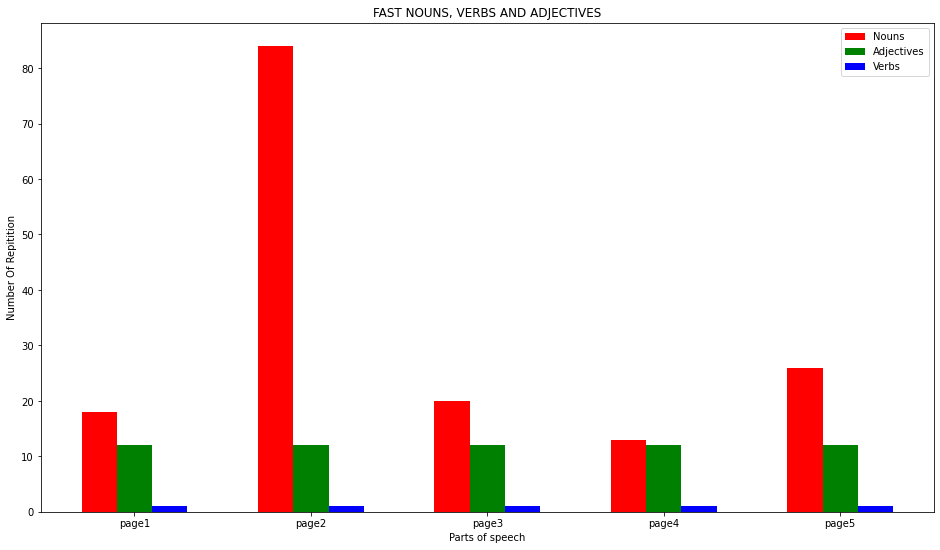

In [9]:
bins = [15,20,25,30,35,40,45]

fastpage1_nouns = len(fastpara1_nouns)
fastpage1_adjs = len(fastpara1_adj)
fastpage1_verbs = len(fastpara1_verbs)

fastpage2_nouns = len(fastpara2_nouns)
fastpage2_adjs = len(fastpara2_adj)
fastpage2_verbs = len(fastpara2_verbs)


fastpage3_nouns = len(fastpara3_nouns)
fastpage3_adjs = len(fastpara3_adj)
fastpage3_verbs = len(fastpara3_verbs)

fastpage4_nouns = len(fastpara4_nouns)
fastpage4_adjs = len(fastpara4_adj)
fastpage4_verbs = len(fastpara4_verbs)

fastpage5_nouns = len(fastpara5_nouns)
fastpage5_adjs = len(fastpara5_adj)
fastpage5_verbs = len(fastpara5_verbs)

fastnouns = [fastpage1_nouns,fastpage2_nouns,fastpage3_nouns,fastpage4_nouns,fastpage5_nouns]
fastadjs = [fastpage1_adjs,fastpage1_adjs,fastpage1_adjs,fastpage1_adjs,fastpage1_adjs]
fastverbs = [fastpage1_verbs,fastpage1_verbs,fastpage1_verbs,fastpage1_verbs,fastpage1_verbs]

plt.figure(figsize = (16,9))

N = 5
ind = np.arange(N) 
width = 0.2

bar1 = plt.bar(ind, fastnouns, width, color = 'r')
bar2 = plt.bar(ind+width, fastadjs, width, color='g')
bar3 = plt.bar(ind+width*2, fastverbs, width, color = 'b')

plt.title("FAST NOUNS, VERBS AND ADJECTIVES")
plt.xlabel("Parts of speech")
plt.ylabel("Number Of Repitition")
plt.legend()
 
plt.xticks(ind+width,['page1', 'page2', 'page3','page4','page5'])
plt.legend( (bar1, bar2, bar3), ('Nouns', 'Adjectives', 'Verbs') )
plt.show()


# VISUALISATION OF DATA UNI 2

No handles with labels found to put in legend.


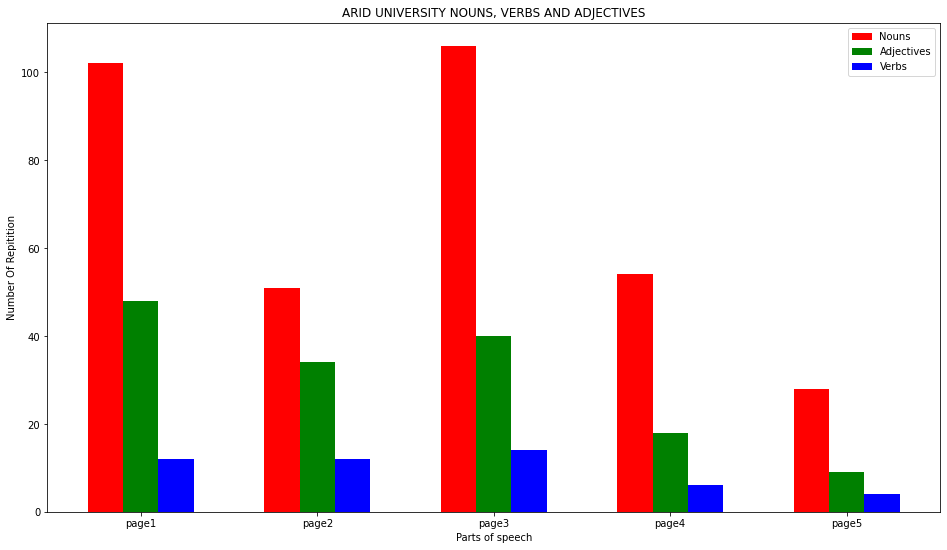

In [10]:
uaarpage1_nouns = len(uaarpara1_nouns)
uaarpage1_adjs = len(uaarpara1_adj)
uaarpage1_verbs = len(uaarpara1_verbs)

uaarpage2_nouns = len(uaarpara2_nouns)
uaarpage2_adjs = len(uaarpara2_adj)
uaarpage2_verbs = len(uaarpara2_verbs)

uaarpage3_nouns = len(uaarpara3_nouns)
uaarpage3_adjs = len(uaarpara3_adj)
uaarpage3_verbs = len(uaarpara3_verbs)

uaarpage4_nouns = len(uaarpara4_nouns)
uaarpage4_adjs = len(uaarpara4_adj)
uaarpage4_verbs = len(uaarpara4_verbs)

uaarpage5_nouns = len(uaarpara5_nouns)
uaarpage5_adjs = len(uaarpara5_adj)
uaarpage5_verbs = len(uaarpara5_verbs)

uaarnouns = [uaarpage1_nouns,uaarpage2_nouns,uaarpage3_nouns,uaarpage4_nouns,uaarpage5_nouns]
uaaradjs = [uaarpage1_adjs,uaarpage2_adjs,uaarpage3_adjs,uaarpage4_adjs,uaarpage5_adjs]
uaarverbs = [uaarpage1_verbs,uaarpage2_verbs,uaarpage3_verbs,uaarpage4_verbs,uaarpage5_verbs]


plt.figure(figsize = (16,9))

N = 5
ind = np.arange(N) 
width = 0.2

bar1 = plt.bar(ind, uaarnouns, width, color = 'r')
bar2 = plt.bar(ind+width, uaaradjs, width, color='g')
bar3 = plt.bar(ind+width*2, uaarverbs, width, color = 'b')

plt.title("ARID UNIVERSITY NOUNS, VERBS AND ADJECTIVES")
plt.xlabel("Parts of speech")
plt.ylabel("Number Of Repitition")
plt.legend()

plt.xticks(ind+width,['page1', 'page2', 'page3','page4','page5'])
plt.legend( (bar1, bar2, bar3), ('Nouns', 'Adjectives', 'Verbs') )
plt.show()


# VISUALSATION OF DATA UNI 3

No handles with labels found to put in legend.


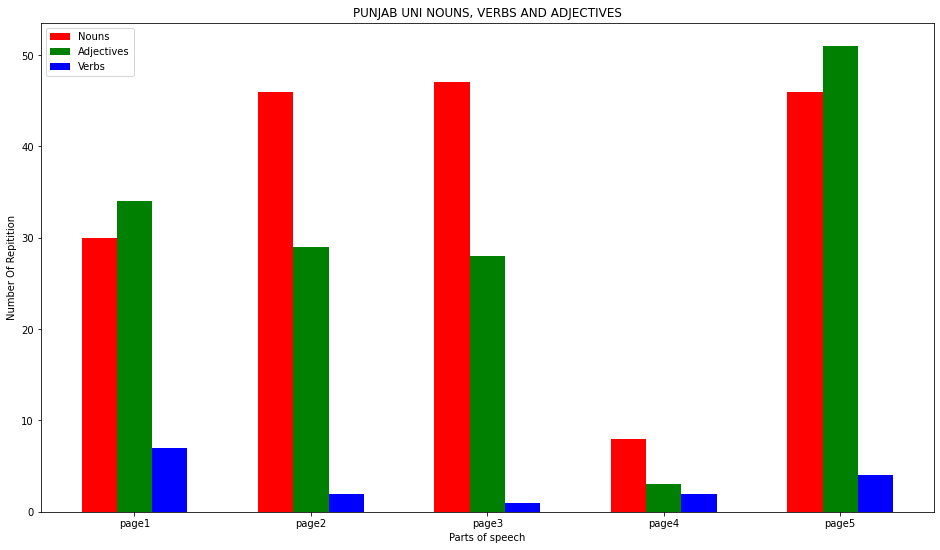

In [11]:
pupage1_nouns = len(pupara1_nouns)
pupage1_adjs = len(pupara1_adj)
pupage1_verbs = len(pupara1_verbs)

pupage2_nouns = len(pupara2_nouns)
pupage2_adjs = len(pupara2_adj)
pupage2_verbs = len(pupara2_verbs)

pupage3_nouns = len(pupara3_nouns)
pupage3_adjs = len(pupara3_adj)
pupage3_verbs = len(pupara3_verbs)

pupage4_nouns = len(pupara4_nouns)
pupage4_adjs = len(pupara4_adj)
pupage4_verbs = len(pupara4_verbs)

pupage5_nouns = len(pupara5_nouns)
pupage5_adjs = len(pupara5_adj)
pupage5_verbs = len(pupara5_verbs)

punouns = [pupage1_nouns,pupage2_nouns,pupage3_nouns,pupage4_nouns,pupage5_nouns]
puadjs = [pupage1_adjs,pupage2_adjs,pupage3_adjs,pupage4_adjs,pupage5_adjs]
puverbs = [pupage1_verbs,pupage2_verbs,pupage3_verbs,pupage4_verbs,pupage5_verbs]

plt.figure(figsize = (16,9))
N = 5
ind = np.arange(N) 
width = 0.2

bar1 = plt.bar(ind, punouns, width, color = 'r')
bar2 = plt.bar(ind+width, puadjs, width, color='g')
bar3 = plt.bar(ind+width*2, puverbs, width, color = 'b')

plt.title("PUNJAB UNI NOUNS, VERBS AND ADJECTIVES")
plt.xlabel("Parts of speech")
plt.ylabel("Number Of Repitition")
plt.legend()
plt.xticks(ind+width,['page1', 'page2', 'page3','page4','page5'])
plt.legend( (bar1, bar2, bar3), ('Nouns', 'Adjectives', 'Verbs') )
plt.show()


No handles with labels found to put in legend.


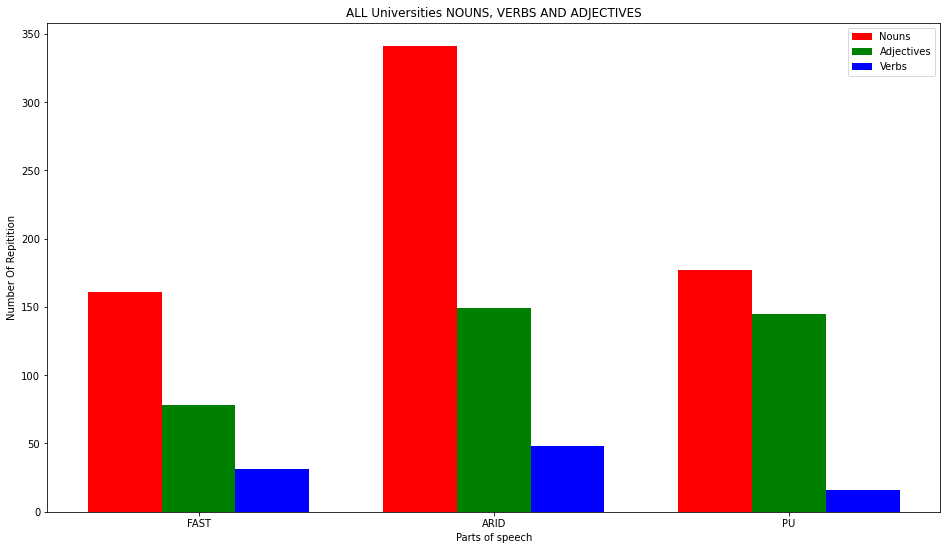

In [12]:
fastall_nouns =  fastpage1_nouns + fastpage2_nouns + fastpage3_nouns + fastpage4_nouns + fastpage5_nouns
fastall_adj = fastpage1_adjs + fastpage2_adjs + fastpage3_adjs + fastpage4_adjs + fastpage5_adjs
fastall_verbs = fastpage1_verbs + fastpage2_verbs + fastpage3_verbs + fastpage4_verbs + fastpage5_verbs 

uaarall_nouns =  uaarpage1_nouns + uaarpage2_nouns + uaarpage3_nouns + uaarpage4_nouns + uaarpage5_nouns
uaarall_adj = uaarpage1_adjs + uaarpage2_adjs + uaarpage3_adjs + uaarpage4_adjs + uaarpage5_adjs
uaarall_verbs = uaarpage1_verbs + uaarpage2_verbs + uaarpage3_verbs + uaarpage4_verbs + uaarpage5_verbs 

puall_nouns = pupage1_nouns + pupage2_nouns + pupage3_nouns + pupage4_nouns + pupage5_nouns
puall_adj = pupage1_adjs + pupage2_adjs + pupage3_adjs + pupage4_adjs + pupage5_adjs
puall_verbs = pupage1_verbs + pupage2_verbs + pupage3_verbs + pupage4_verbs + pupage5_verbs 

nouns = [fastall_nouns,uaarall_nouns,puall_nouns]
adj =  [fastall_adj ,uaarall_adj ,puall_adj ]
verbs = [fastall_verbs,uaarall_verbs,puall_verbs]

plt.figure(figsize = (16,9))
N = 3
ind = np.arange(N) 
width = 0.25

bar1 = plt.bar(ind, nouns, width, color = 'r')
bar2 = plt.bar(ind+width, adj, width, color='g')
bar3 = plt.bar(ind+width*2,verbs, width, color = 'b')

plt.title("ALL Universities NOUNS, VERBS AND ADJECTIVES")
plt.xlabel("Parts of speech")
plt.ylabel("Number Of Repitition")
plt.legend()
plt.xticks(ind+width,['FAST', 'ARID', 'PU'])
plt.legend( (bar1, bar2, bar3), ('Nouns', 'Adjectives', 'Verbs') )
plt.show()


# Normalizing All Nouns

In [13]:
nouns_source = fastpara1_nouns + fastpara2_nouns + fastpara3_nouns + fastpara4_nouns + fastpara5_nouns + uaarpara1_nouns + uaarpara2_nouns + uaarpara3_nouns + uaarpara4_nouns + uaarpara5_nouns + pupara1_nouns + pupara2_nouns + pupara3_nouns + pupara4_nouns + pupara5_nouns
punct = string.punctuation
list1 = ['&','%','s','a.','"']

def normalize(ns):
    for token in ns:
        if token not in punct and token not in list1:
            yield token

nouns_final = list(normalize(nouns_source))


# Creating DataFrame with counts of Nouns

In [14]:
df = pd.DataFrame(nouns_final, columns = ['Nouns'])
noun = df['Nouns'].unique()
size1 = noun.size
countnoun = [0]*size1
for i in range(size1):
    countnoun[i] = int(df[(df['Nouns']==noun[i])].count())

data = pd.DataFrame(noun,columns = ['Noun'])
data['Counts'] = countnoun
data

,Noun,Counts
0,quality,10
1,impact,2
2,development,15
3,software,1
4,university,27
...,...,...
339,group,1
340,work,1
341,promotion,1
342,welfare,1


# Adding Nodes

In [15]:
G = nx.Graph()
# G = nx.dodecahedral_graph()
G.add_nodes_from(nouns_final)
G.nodes

NodeView(('quality', 'impact', 'development', 'software', 'university', 'world', 'class', 'environment', 'quarter', 'faculty', 'edge', 'research', 'vision', 'decade', 'procedure', 'admission', 'Admission', 'post', 'hand', 'online', 'system', 'applicant', 'use', 'information', 'case', 'application/admission', 'fee', 'refund', 'payment', 'test', 'campus', 'date', 'time', 'card', 'student', 'exam', 'result', 'computer', 'candidate', 'mouse', 'keyboard', 'examination', 'etc', 'sequence', 'section', 'response', 'question', 'duration', 'end', 'summary', 'screen', 'centre', 'admit', 'anything', 'cell', 'email', 'status', 'web', 'site', 'admissions.nu.edu.pk', 'www.nu.edu.pk', 'honor', 'sector', 'advantage', 'selfless', 'ceaseless', 'rate', 'science', 'leadership', 'position', 'management', 'tireless', 'hallmark', 'excellence', 'arena', 'market', 'community', 'Vision', 'Mission', 'world-class', 'education', 'irrespective', 'background', 'ethnicity', 'gender', 'religion', 'society', 'knowledge'

In [16]:
l1 = sent_tokenize(fast_paragraph1)
l2 = sent_tokenize(fast_paragraph2)
l3 = sent_tokenize(fast_paragraph3)
l4 = sent_tokenize(fast_paragraph4)
l5 = sent_tokenize(fast_paragraph5)

l6 = sent_tokenize(uaar_paragraph1)
l7 = sent_tokenize(uaar_paragraph2)
l8 = sent_tokenize(uaar_paragraph3)
l9 = sent_tokenize(uaar_paragraph4)
l10 = sent_tokenize(uaar_paragraph5)

l11 = sent_tokenize(pu_paragraph1)
l12 = sent_tokenize(pu_paragraph2)
l13 = sent_tokenize(pu_paragraph3)
l14 = sent_tokenize(pu_paragraph4)
l15 = sent_tokenize(pu_paragraph5)

sentences = l1+l2+l3+l4+l5+l6+l7+l8+l9+l10+l11+l12+l13+l14+l15
# sentences

# Adding Edges Between Nouns in a Sentence

In [17]:
edge_weight = []

list1 = ['&','%','s','a.','"']
for i in range(len(sentences)):
    tokens = word_tokenize(sentences[i])
    result=pos_tag(tokens)
    size=len(result)
    for j in range(size):
        if result[j][1]=='NN':
            for k in range(j+1,size):
                if result[k][1]=='NN' and result[k][1] not in list1:
                    G.add_edge(result[j][0], result[k][0])
                    edge_weight.append(k-j)
                    

# ALL EDGES

In [18]:
edges = list(G.edges)
print(edges)

[('quality', 'impact'), ('quality', 'development'), ('quality', 'software'), ('quality', 'education'), ('quality', 'irrespective'), ('quality', 'background'), ('quality', 'ethnicity'), ('quality', 'gender'), ('quality', 'religion'), ('quality', 'society'), ('quality', 'assurance'), ('quality', 'mechanism'), ('quality', 'assessment'), ('quality', 'level'), ('quality', 'achievement'), ('quality', 'accreditation'), ('quality', 'status'), ('quality', 'recognition'), ('quality', 'location'), ('quality', 'utilization'), ('quality', 'expertise'), ('quality', 'twin'), ('quality', 'specialization'), ('quality', 'search'), ('quality', 'committee'), ('quality', 'quantity'), ('quality', 'opportunity'), ('quality', 'world'), ('quality', 'testament'), ('quality', 'reputation'), ('quality', 'position'), ('quality', 'seat'), ('quality', 'account'), ('quality', 'heritage'), ('quality', 'multitude'), ('quality', 'youth'), ('quality', 'cost'), ('quality', 'mission'), ('quality', 'productivity'), ('qualit

# ALL EDGE WEIGHTS

In [19]:
edge_weight

[2,
 8,
 11,
 6,
 9,
 3,
 1,
 3,
 15,
 22,
 2,
 14,
 21,
 12,
 19,
 7,
 1,
 4,
 3,
 7,
 8,
 14,
 1,
 7,
 6,
 2,
 7,
 5,
 3,
 1,
 13,
 21,
 12,
 20,
 8,
 3,
 14,
 17,
 18,
 11,
 14,
 15,
 3,
 4,
 1,
 15,
 25,
 10,
 5,
 6,
 10,
 12,
 18,
 1,
 5,
 7,
 13,
 4,
 6,
 12,
 2,
 8,
 6,
 3,
 15,
 17,
 23,
 25,
 12,
 14,
 20,
 22,
 2,
 8,
 10,
 6,
 8,
 2,
 5,
 6,
 11,
 1,
 6,
 5,
 6,
 8,
 11,
 2,
 5,
 3,
 5,
 8,
 14,
 6,
 4,
 3,
 6,
 9,
 13,
 3,
 7,
 4,
 3,
 4,
 8,
 1,
 5,
 4,
 5,
 9,
 4,
 3,
 6,
 13,
 3,
 10,
 7,
 1,
 4,
 6,
 10,
 11,
 3,
 5,
 9,
 10,
 2,
 6,
 7,
 4,
 5,
 1,
 3,
 4,
 1,
 7,
 5,
 3,
 7,
 8,
 9,
 11,
 4,
 5,
 6,
 8,
 1,
 2,
 4,
 1,
 3,
 2,
 2,
 7,
 8,
 1,
 7,
 9,
 22,
 23,
 24,
 2,
 15,
 16,
 17,
 13,
 14,
 15,
 1,
 2,
 1,
 1,
 6,
 10,
 12,
 18,
 5,
 9,
 11,
 17,
 4,
 6,
 12,
 2,
 8,
 6,
 2,
 5,
 8,
 11,
 3,
 6,
 9,
 3,
 6,
 3,
 20,
 1,
 5,
 9,
 11,
 13,
 15,
 20,
 4,
 8,
 10,
 12,
 14,
 19,
 4,
 6,
 8,
 10,
 15,
 2,
 4,
 6,
 11,
 2,
 4,
 9,
 2,
 7,
 5,
 6,
 1,
 5,
 4,
 5,
 7,
 8,

# Printing Number of Nodes and Number of Edges

In [20]:
print('number of edges: {}'.format(G.number_of_edges()))
print('number of nodes: {}'.format(G.number_of_nodes()))

number of edges: 1140
number of nodes: 347


In [28]:
plt.figure(1, figsize = (100,100))
try:
    #nx.draw(G, width=edge_weight, node_size=100)
    nx.draw(G, with_labels=True,node_size=500,node_color='red', width=10, font_size=8)
except:
    do_nothing=True

# Number of Connected Components

In [22]:
con = len(edge_weight)
print(con)

1347


# Top 10 Nouns with highest degree and their degree value

In [23]:
degrees = [val for (node, val) in sorted(G.degree(), key=lambda pair: pair[0])]
deg10 = degrees[0:10]
countnoun.sort()

dat = data.sort_values(by=['Counts'], ascending = False)
dat = dat.head(10)
val10 = data['Counts'].sort_values(ascending=False).head(10)
highest = pd.DataFrame(dat,columns=['Noun'])
highest['Degree'] = deg10
highest['Value']  = val10
highest

,Noun,Degree,Value
4,university,24,27
11,research,0,25
9,faculty,6,18
2,development,1,15
80,education,3,12
0,quality,6,10
103,country,1,10
29,test,0,9
138,teaching,2,8
32,time,4,7


# Printing All the nouns at distance 5 from 'QUALITY'

In [24]:
edge_weight = []

list1 = ['&','%','s','a.','"']
for i in range(len(sentences)):
    tokens = word_tokenize(sentences[i])
    result=pos_tag(tokens)
    size=len(result)
    for j in range(size):
        if result[j][1]=='NN' and (result[j][0] == 'Quality' or result[j][0] == 'quality' or result[j][0] == 'QUALITY'):
            for k in range(j+1,size):
                if result[k][1]=='NN' and result[k][0] not in list1 and k-j == 5:
                    print(result[k][0])

irrespective
mechanism
mechanism
cost


In [ ]:
# https://www.toptal.com/data-science/graph-data-science-python-networkx